In [10]:
location = "/mnt/c/Users/Saurav Baral/Desktop/20.RERConverge_trimmed/unTrimmed/3.For_tree"
gene_anno_dic = {}
with open(f"{location}/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()
        # break
# print(gene_anno_dic)

In [15]:
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/2.Two_state"
output = ",period,timeless,clock,cycle,cwo,cry1a,cry1b,cry2,timeout,Annotation"
with open(f"{location}/ERC_clock_filtered_diapause.csv", 'r') as cluster_file:
    for lines in cluster_file.readlines()[1:]:
        # print(lines)
        gene_name = lines.split(",")[0]
        # print(gene_name)
        if gene_name in gene_anno_dic:
            # print(gene_anno_dic[gene_name])
            output += f"\n{lines.strip()},{gene_anno_dic[gene_name]}"
        else:
            output += f"\n{lines.strip()},{gene_name}"
with open(f"{location}/ERC_clock_filtered_diapause.annotated.csv", 'w') as cluster_file:
    cluster_file.write(output)

In [4]:
gene_dictionary = {}

with open(f"{location}/ERC_clock_filtered_diapause.annotated.csv", 'r') as cluster_file:
    cluster_lines = cluster_file.readlines()

genes = cluster_lines[0].split(',')
for gene_name in genes[1:-3]:
    gene_dictionary[gene_name] = {}
for lines in cluster_lines[1:]:
    gene_dictionary["period"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[1]]
    gene_dictionary["timeless"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[2]]
    gene_dictionary["clock"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[3]]
    gene_dictionary["cycle"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[4]]
    gene_dictionary["cwo"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[5]]
    gene_dictionary["cry1a"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[6]]
    gene_dictionary["cry1b"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[7]]
    gene_dictionary["cry2"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[8]]
    gene_dictionary["timeout"][lines.strip().split(",")[-1]] = [lines.strip().split(",")[0],lines.strip().split(",")[9]]
print(gene_dictionary)

{'period': {'SMNDC1': ['11864at7088', '0.116012820002804'], '5091at7088': ['5091at7088', '0.208019823460345'], 'PGM2': ['4306at7088', '0.313258617302701'], '6279at7088': ['6279at7088', '0.0232736174809524'], 'PCMT1': ['10940at7088', '0.178966811632823'], 'TROVE2': ['3990at7088', '0.127476568451665'], '4379at7088': ['4379at7088', '0.030745466458431'], 'ken': ['3641at7088', '0.0371969185879509'], '6540at7088': ['6540at7088', '0.0810315799175373'], '2353at7088': ['2353at7088', '0.361550751963974'], 'MRPS9': ['6097at7088', '0.171909318730877'], 'EIF3A': ['2081at7088', '0.0558031786501981'], '16011at7088': ['16011at7088', '0.0904784059184024'], 'TRNT1': ['6477at7088', '0.186158419651173'], 'TBRG4': ['4742at7088', '0.0476049265104641'], 'PGM3': ['4142at7088', '0.161052334561064'], 'TRAFD1': ['10029at7088', '0.0878475118049883'], '2994at7088': ['2994at7088', '0.0732572473117594'], 'FSCN1': ['3356at7088', '0.0525770547252607'], 'EAF1': ['12821at7088', '0.143493052901294'], '6955at7088': ['6955

In [5]:
output = "Gene1,Gene2,Busco,Correlation"
to_remove = ["tim","9062at7088","per","TIMELESS","CLOCK"]
for gene1, value in gene_dictionary.items():
    for gene2, cor in value.items():
        if gene2 != gene1 and gene2 not in to_remove:
            output += f"\n{gene1},{gene2},{','.join(cor)}"
# print(output)
with open(f"{location}/ERC_clock_filtered_long_form_diapause.csv", 'w') as cluster_file:
    cluster_file.write(output)

In [17]:
import pandas as pd

csv_file = pd.read_csv(f"{location}/ERC_clock_filtered_diapause.annotated.csv")
# print(csv_file)
csv_file.drop(columns=["Unnamed: 0"], inplace=True)
csv_file.set_index('Annotation', inplace=True)
csv_file.drop(index=["tim", "CLOCK","per"], inplace=True)
csv_file = csv_file.sort_index(axis=1)
csv_file = csv_file.sort_index(axis=0)
print(csv_file)

                clock     cry1a     cry1b      cry2       cwo     cycle  \
Annotation                                                                
10066at7088 -0.052177 -0.061155  0.306208 -0.054194 -0.093552 -0.149823   
10163at7088  0.178212  0.247439  0.167305  0.040005  0.249706  0.317173   
10178at7088 -0.047789 -0.129233  0.332640  0.179184 -0.124189 -0.068485   
10294at7088  0.079687  0.300047 -0.115550  0.078132  0.243936  0.091548   
10308at7088 -0.126913 -0.296535  0.336890 -0.002829 -0.219665 -0.253929   
...               ...       ...       ...       ...       ...       ...   
timeless     0.583511  0.101772 -0.106243  0.463997  0.084907  0.364145   
timeout      0.033798  0.010569  0.204067  0.104678 -0.027128 -0.086548   
trrap        0.197887  0.371533 -0.056916  0.039125  0.219079  0.124950   
unc-132      0.000799  0.311478 -0.020381 -0.104589  0.281485  0.125531   
y            0.074659 -0.025152  0.306686 -0.045141  0.083273 -0.112401   

               period  t

/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: The condensed distance matrix must contain only finite values.

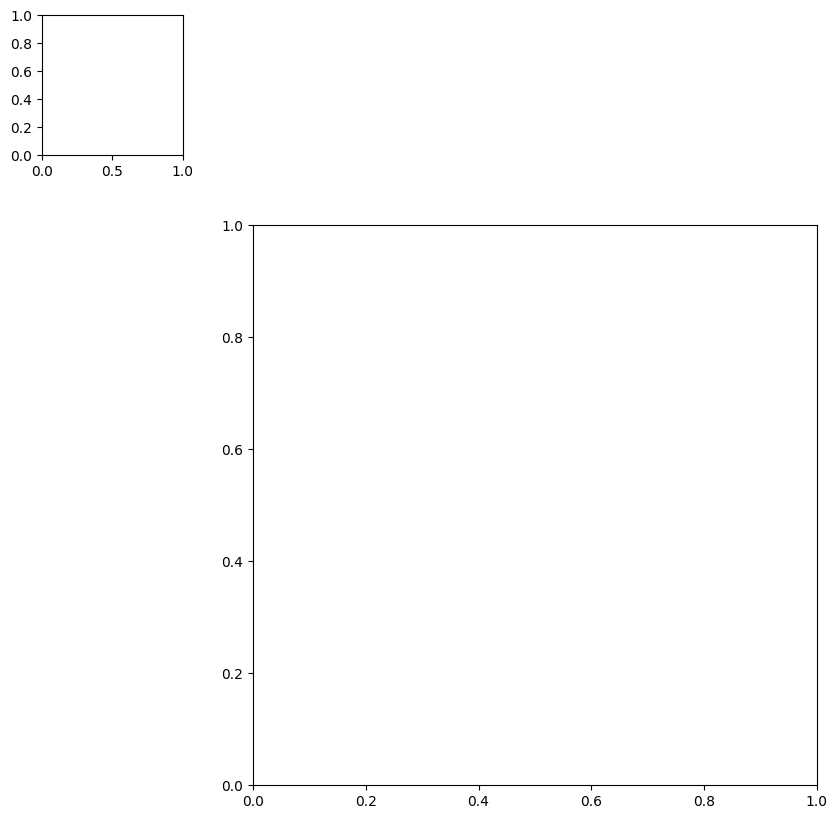

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.clustermap(csv_file, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
print("AA")

In [3]:
import pandas as pd
location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/unTrimmed/3.For_tree"
csv_file = pd.read_csv(f"{location}/ERC_correlation.csv")

# csv_file = pd.read_csv(f"{location}/ERC_correlation_diapause.csv")
csv_file.index = csv_file.columns
string_to_remove = "_nostop.fas.aligned.fas.best"
csv_file.columns = csv_file.columns.str.replace(string_to_remove, "", regex=False)
csv_file.index = csv_file.index.str.replace(string_to_remove, "", regex=False)

string_to_remove = ".fas.ClipKIT"
csv_file.columns = csv_file.columns.str.replace(string_to_remove, "", regex=False)
csv_file.index = csv_file.index.str.replace(string_to_remove, "", regex=False)

# candidate_gene=["period","timeless","clock","cycle","cwo","cry1a","cry1b","cry2","timeout"]
# candidate_gene= ['4848at7088', '5474at7088', '9604at7088', 'cry2', 'clock', '5889at7088', '15036at7088', '2905at7088', '13381at7088', '2639at7088', '15116at7088', '10626at7088', '13811at7088', '1422at7088', 'period', 'timeless', '13602at7088']

# selected_columns = csv_file[candidate_gene]
# filtered_df = selected_columns[selected_columns.index.isin(candidate_gene)]
# print(filtered_df)

In [4]:
candidate_gene= ['LHX8', 'HLF', 'GPSM2', 'cycle']
# candidate_gene = ["period","timeless","cry2","clock","cycle","cwo","cry1a","cry1b","timeout"]
location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.ERC_new_diapause_nondia/3.For Clusturing"
gene_anno_dic = {}
with open(f"{location}/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[anno_name.strip()]= gene_name
can_gen = []
for gene_name in candidate_gene:
    can_gen.append(gene_anno_dic[gene_name].replace('.fas.ClipKIT"', ''))
print(can_gen)


selected_columns = csv_file[can_gen]
filtered_df = selected_columns[selected_columns.index.isin(can_gen)]
print(filtered_df)

['9768at7088', '11619at7088', '4078at7088', 'cycle']
             9768at7088  11619at7088  4078at7088     cycle
9768at7088     1.000000     0.429321    0.458105  0.380526
11619at7088    0.429321          NaN    0.394446  0.469707
4078at7088     0.458105     0.394446         NaN  0.583151
cycle          0.380526     0.469707    0.583151       NaN


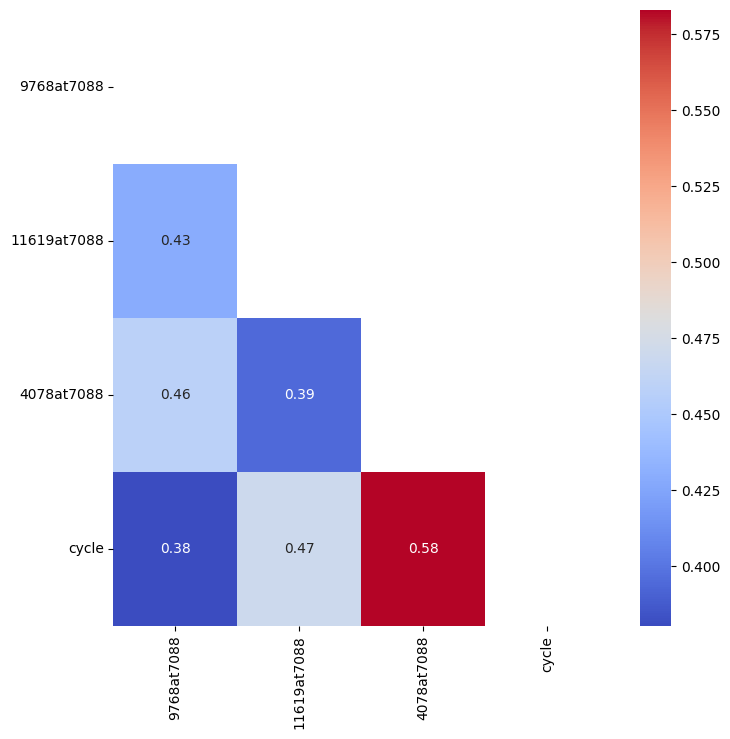

In [7]:
filtered_df = filtered_df.fillna(1)
# index_order = ["period","timeless","cry2","clock","cycle","cwo","cry1a","cry1b","timeout"]

filtered_df = filtered_df.reindex(index=can_gen, columns=can_gen)
# filtered_df = filtered_df.sort_index(axis=1)
# print(filtered_df)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mask = np.triu(np.ones_like(filtered_df, dtype=bool))
plt.figure(figsize=(8, 8))
ax = sns.heatmap(filtered_df, mask=mask, annot=True, cmap='coolwarm', cbar=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')  # Vertical x-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right') 
# plt.savefig(f"{location}/ERC_correlation_nondiapause.pdf")
 # plt.figure()
# sns.clustermap(filtered_df, cmap='coolwarm', annot=True)
plt.show()
# f.fig.savefig(f"{location}/ERC_correlation.pdf")

In [6]:
!pip3 install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.3 MB/s eta 0:00:00a 0:00:01
